#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

Compare results between different loss functions with same testData  
>'categorical_crossentropy': accuracy= 0.6402000188827515 loss= 1.1034793905258178  
'MSE'                     : accuracy= 0.6541000008583069 loss= 0.050243260014057156  
'binary_crossentropy'     : accuracy= 0.9331197142601013 loss= 0.1692422109603882  


# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history,train,test):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[test])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [32]:
def ModelCompile(loss_select):
    model.compile(loss=loss_select, optimizer='sgd', metrics=['accuracy'])
    train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                            validation_split=0.25,
                            epochs=12, batch_size=128, verbose=1)
    show_train_history(train_history,'accuracy','val_accuracy')
    show_train_history(train_history,'loss','val_loss')
    scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
    print('accuracy=',scores[1],'\nloss=',scores[0]) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 5s 123us/step - loss: 1.1295 - accuracy: 0.5981 - val_loss: 1.1997 - val_accuracy: 0.6120
Epoch 2/12
37500/37500 [==============================] - 4s 117us/step - loss: 1.1128 - accuracy: 0.6069 - val_loss: 1.1847 - val_accuracy: 0.6198
Epoch 3/12
37500/37500 [==============================] - 4s 117us/step - loss: 1.1005 - accuracy: 0.6106 - val_loss: 1.1768 - val_accuracy: 0.6181
Epoch 4/12
37500/37500 [==============================] - 4s 117us/step - loss: 1.0894 - accuracy: 0.6149 - val_loss: 1.1796 - val_accuracy: 0.6157
Epoch 5/12
37500/37500 [==============================] - 4s 117us/step - loss: 1.0846 - accuracy: 0.6158 - val_loss: 1.1716 - val_accuracy: 0.6234
Epoch 6/12
37500/37500 [==============================] - 4s 116us/step - loss: 1.0736 - accuracy: 0.6202 - val_loss: 1.1707 - val_accuracy: 0.6203
Epoch 7/12
37500/37500 [==============================] - 4s 1

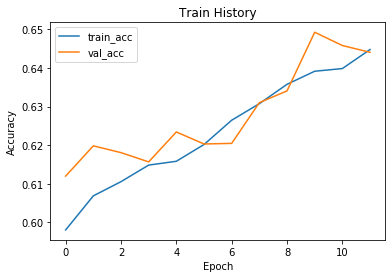

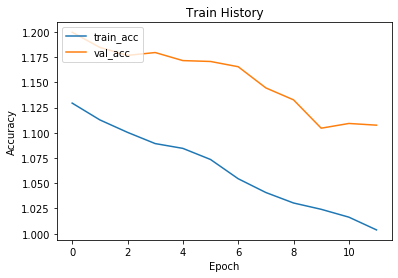

10000/10000 [==============================] - 1s 92us/step
accuracy= 0.6402000188827515 
loss 1.1034793905258178


In [29]:
ModelCompile(loss_select='categorical_crossentropy')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 5s 121us/step - loss: 0.0465 - accuracy: 0.6569 - val_loss: 0.0505 - val_accuracy: 0.6545
Epoch 2/12
37500/37500 [==============================] - 4s 115us/step - loss: 0.0464 - accuracy: 0.6566 - val_loss: 0.0505 - val_accuracy: 0.6548
Epoch 3/12
37500/37500 [==============================] - 4s 115us/step - loss: 0.0462 - accuracy: 0.6587 - val_loss: 0.0503 - val_accuracy: 0.6545
Epoch 4/12
37500/37500 [==============================] - 4s 114us/step - loss: 0.0462 - accuracy: 0.6570 - val_loss: 0.0503 - val_accuracy: 0.6528
Epoch 5/12
37500/37500 [==============================] - 4s 114us/step - loss: 0.0460 - accuracy: 0.6600 - val_loss: 0.0502 - val_accuracy: 0.6538
Epoch 6/12
37500/37500 [==============================] - 4s 115us/step - loss: 0.0461 - accuracy: 0.6583 - val_loss: 0.0501 - val_accuracy: 0.6544
Epoch 7/12
37500/37500 [==============================] - 4s 1

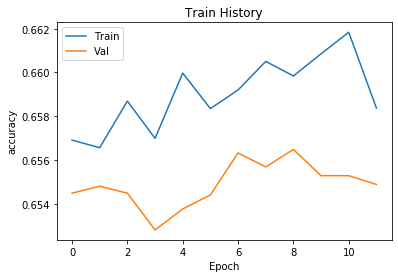

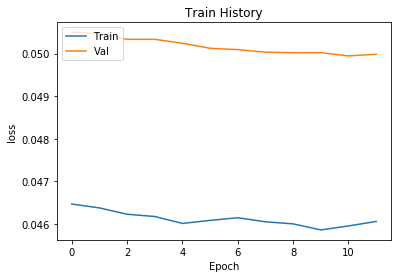

10000/10000 [==============================] - 1s 77us/step
accuracy= 0.6541000008583069 
loss 0.050243260014057156


In [31]:
ModelCompile('MSE')

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 5s 123us/step - loss: 0.1564 - accuracy: 0.9383 - val_loss: 0.1725 - val_accuracy: 0.9327
Epoch 2/12
37500/37500 [==============================] - 4s 116us/step - loss: 0.1554 - accuracy: 0.9387 - val_loss: 0.1713 - val_accuracy: 0.9332
Epoch 3/12
37500/37500 [==============================] - 4s 116us/step - loss: 0.1552 - accuracy: 0.9389 - val_loss: 0.1717 - val_accuracy: 0.9332
Epoch 4/12
37500/37500 [==============================] - 4s 116us/step - loss: 0.1553 - accuracy: 0.9383 - val_loss: 0.1709 - val_accuracy: 0.9333
Epoch 5/12
37500/37500 [==============================] - 4s 116us/step - loss: 0.1560 - accuracy: 0.9383 - val_loss: 0.1716 - val_accuracy: 0.9331
Epoch 6/12
37500/37500 [==============================] - 4s 116us/step - loss: 0.1544 - accuracy: 0.9392 - val_loss: 0.1708 - val_accuracy: 0.9332
Epoch 7/12
37500/37500 [==============================] - 4s 1

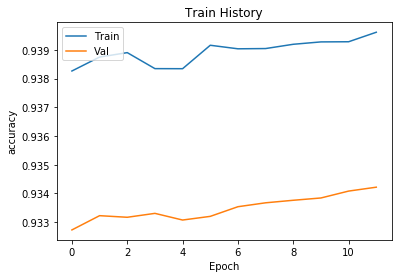

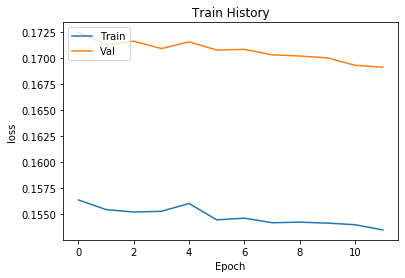

10000/10000 [==============================] - 1s 80us/step
accuracy= 0.9331197142601013 
loss= 0.1692422109603882


In [33]:
ModelCompile('binary_crossentropy')